The main objective of this analysis is to come up with a regression model that can predict car sales price by training a model in the given data set also highlighting the main features that affect the price of the car. 

Data set description: 
The dataset contains car sales prices with the details of a description of each item and the sales price  
The dataset was downloaded from kaggle  
The data set is a 19237 rows x 18 columns with the flowing columns  
ID: the id of the car 
Price: price of the car (Target Column) 
Levy 
Manufacturer: name of the manufacturer 
Model: name of model 
Prod. Year: year of production  
Category: the category of the car (Sedan, Jeep, Minivan, etc…) 
Leather interior: dose it have it or not  
Fuel type 
Engine volume: in liters  
Mileage: in kilometers  Cylinders: number of cylinders  Gear box type: auto ,manual; ,etc.  
Drive wheels: 4*4, front , rear  
Doors: number of doors 
Wheel: number of wheels  
Color 
Airbags: number of air bags 


First importing the necessary libraries  

In [1]:
import skillsnetwork
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
import os
import numpy as np
import pandas as pd
import skillsnetwork
from scipy.stats import boxcox
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import keras 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
path='data/car_price_prediction.csv'
df=pd.read_csv(path ,sep='\t')
data=pd.read_csv(path ,)
data.drop(labels='ID', axis=1)
data.head()
data.columns
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Inspecting the dataset and dealing with duplicates 

In [2]:
data.shape
data1=data

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
data.duplicated().sum()
data= data.drop_duplicates()


Dealing with columns with numeric values but implemented as objects

In [5]:
dt_obj = data.select_dtypes(include = ['object'])
col=dt_obj
mil=[]
lev=[]
engvol=[]
for stri in dt_obj['Mileage'] :
   mil.append(int(stri.strip('km')))
for stri in dt_obj['Engine volume'] :
   engvol.append(float(stri.strip('Turbo')))
for stri in dt_obj['Levy'] :
   lev.append(int(stri.replace('-','0')))
data.drop('Mileage', inplace=True, axis=1)
data.insert(7, "Mileage",mil)
data.drop('Levy', inplace=True, axis=1)
data.insert(7, "Levy",lev)       
data.drop('Engine volume', inplace=True, axis=1)
data.insert(8, "Engine volume",engvol)      
data
dt_obj = data.select_dtypes(include = ['object'])




c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
data1=data

Plotting the price against other numeric values ,this doesn’t look comprehendible due to outliers  

<AxesSubplot:>

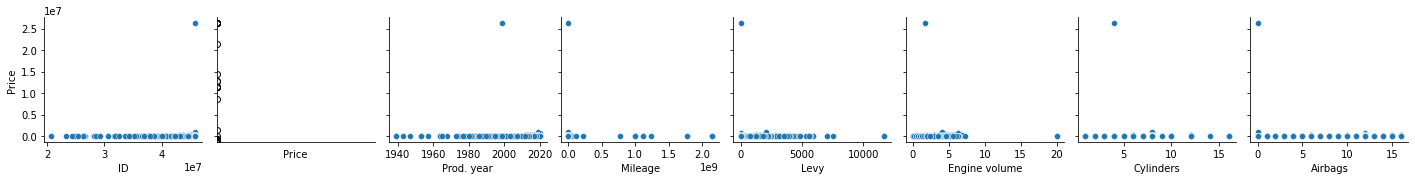

In [7]:
dt_num = data1.select_dtypes(include = ['float64', 'int64'])
dt_num_corr = dt_num.corr()['Price'][:-1]
for i in range(0, len(dt_num.columns), 10):
    sns.pairplot(data=dt_num,
                x_vars=dt_num.columns[i:i+10],
                y_vars=['Price'])

dt_num.boxplot()


dealing with outliers 

<AxesSubplot:>

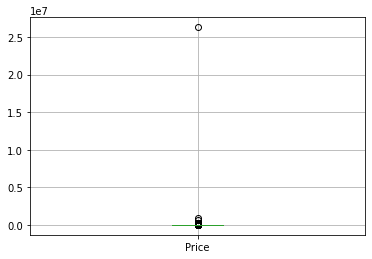

In [8]:

dt_num.boxplot('Price')

In [9]:
data1.sort_values(by = 'Price', ascending = False)[:20]


,ID,Price,Manufacturer,Model,Prod. year,Category,Mileage,Levy,Engine volume,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16983,45812886,26307500,OPEL,Combo,1999,Goods wagon,99999,0,1.7,No,Diesel,4.0,Manual,Front,02-Mar,Left wheel,Blue,0
8541,45761204,872946,LAMBORGHINI,Urus,2019,Universal,2531,2067,4.0,Yes,Petrol,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
1225,45795524,627220,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,0,0,6.3,Yes,Petrol,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
5008,45810285,308906,PORSCHE,911,2016,Coupe,8690,1694,4.0,Yes,Petrol,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12
9367,45229113,297930,MERCEDES-BENZ,AMG GT S,2015,Coupe,20000,0,4.0,Yes,Petrol,8.0,Tiptronic,Rear,02-Mar,Left wheel,White,16
14839,45792307,297930,LAND ROVER,Range Rover Vogue,2019,Jeep,4500,0,3.0,Yes,Diesel,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
7749,45760644,288521,BMW,M5 Машина в максимально,2018,Sedan,13500,2269,4.4,Yes,Petrol,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
10759,45291161,260296,LEXUS,LX 570,2018,Jeep,17700,0,5.7,Yes,Petrol,8.0,Tiptronic,4x4,04-May,Left wheel,Black,10
5840,44991441,254024,MERCEDES-BENZ,GLE 400 A M G,2016,Jeep,73000,1292,3.0,Yes,Petrol,6.0,Tiptronic,4x4,04-May,Left wheel,Black,12
15283,45069516,250574,MERCEDES-BENZ,GLE 400,2017,Jeep,81600,1481,3.0,Yes,Petrol,6.0,Tiptronic,4x4,04-May,Left wheel,Black,12


In [10]:
data.sort_values(by = 'Price', ascending = False
                )
data1= data1.drop(data.index[[16983,8541,1225]])

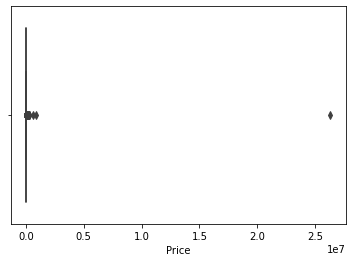

In [11]:
sns.boxplot(x=data1['Price'])
data1.sort_values(by = 'Price', ascending = False)[:10]
data1 = data1.drop(data1[(data1['Price'] >308906)].index)


,ID,Price,Prod. year,Mileage,Levy,Engine volume,Cylinders,Airbags
count,1.891800e+04,18918.000000,18918.000000,1.891800e+04,18918.000000,18918.000000,18918.000000,18918.000000
mean,4.557532e+07,17118.522835,2010.913627,1.555848e+06,632.890898,2.305973,4.579871,6.568559
std,9.376890e+05,18270.086686,5.665150,4.880994e+07,568.208111,0.877122,1.199831,4.322067
min,2.074688e+07,1.000000,1939.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,4.569494e+07,5331.000000,2009.000000,7.022450e+04,0.000000,1.800000,4.000000,4.000000
50%,4.577191e+07,13172.000000,2012.000000,1.264000e+05,642.000000,2.000000,4.000000,6.000000
75%,4.580174e+07,22063.000000,2015.000000,1.891872e+05,916.750000,2.500000,4.000000,12.000000
max,4.581665e+07,308906.000000,2020.000000,2.147484e+09,11714.000000,20.000000,16.000000,16.000000


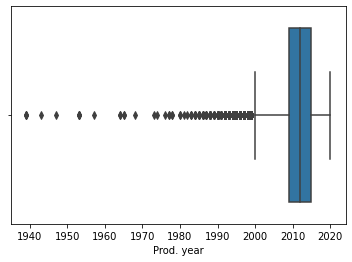

In [12]:
sns.boxplot(x=data['Prod. year'])
data.sort_values(by = 'Prod. year', ascending = True)[:10]
data1.describe()



<AxesSubplot:xlabel='Levy'>

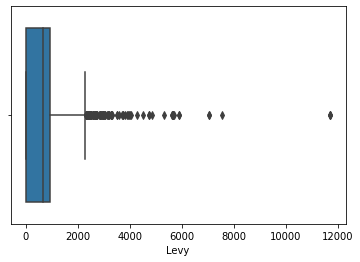

In [13]:

sns.boxplot(x=data1['Levy'])


In [14]:
data.sort_values(by = 'Levy', ascending = False)[:10]
data1= data1.drop(data1[(data1['Levy'] >10000)].index)

In [15]:
data.sort_values(by = 'Mileage', ascending = False)[:10]
#data1= data1.drop(data.index[[15347,11901,15393,2278,19167,6157,12734,17582,19199,]])
data1.sort_values(by = 'Mileage', ascending = False)[:20]
data1 = data1.drop(data1[(data1['Mileage'] >23000000)].index)
data1.sort_values(by = 'Mileage', ascending = False)[:10]
data1 = data1.drop(data1[(data1['Price'] <800)].index)
data1 = data1.drop(data1[(data1['Price'] >308906)].index)


<AxesSubplot:xlabel='Cylinders'>

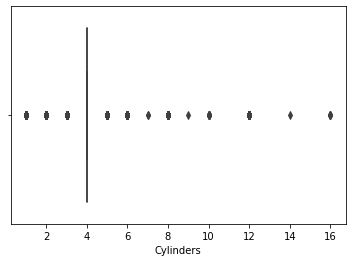

In [16]:
sns.boxplot(x=data1['Cylinders'])


<AxesSubplot:xlabel='Airbags'>

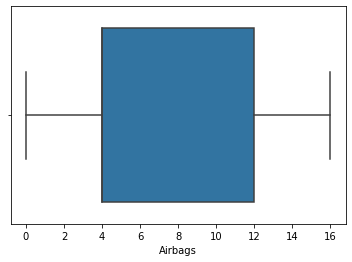

In [17]:
sns.boxplot(x=data1['Airbags'])


,ID,Price,Manufacturer,Model,Prod. year,Category,Mileage,Levy,Engine volume,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
5367,45785703,7840,MERCEDES-BENZ,CLK 430,2005,Cabriolet,156470,5877,7.3,No,Petrol,12.0,Automatic,Rear,04-May,Left wheel,Black,12
4722,45813777,175622,BENTLEY,Mulsanne,2016,Sedan,6189,2819,6.8,Yes,Petrol,8.0,Automatic,Rear,04-May,Left wheel,Black,12
1086,45813007,1019,DODGE,RAM,2014,Pickup,367053,1935,6.7,Yes,Diesel,6.0,Automatic,Front,04-May,Left wheel,White,12
9250,45813837,22266,DODGE,Challenger,2016,Coupe,72995,2658,6.4,Yes,Petrol,8.0,Automatic,Rear,02-Mar,Left wheel,Red,12
11717,45688300,20385,MERCEDES-BENZ,ML 63 AMG,2006,Jeep,264000,0,6.3,Yes,Petrol,8.0,Automatic,4x4,04-May,Left wheel,Black,6
6005,45812939,5331,GAZ,24,1990,Universal,2000,0,6.3,Yes,Petrol,8.0,Manual,4x4,02-Mar,Left wheel,Green,0
13850,45796827,1000,MERCEDES-BENZ,GLS 63 AMG,2014,Sedan,748742,0,6.3,Yes,Petrol,1.0,Manual,Front,02-Mar,Left wheel,Black,12
2922,45788165,109764,MERCEDES-BENZ,C 63 AMG,2011,Sedan,73000,0,6.3,Yes,Petrol,8.0,Tiptronic,Rear,02-Mar,Left wheel,Red,10
9114,45813297,31988,FERRARI,F50,2017,Coupe,419200,3015,6.3,Yes,Petrol,12.0,Automatic,Rear,02-Mar,Left wheel,Silver,12
18884,45350122,29793,MERCEDES-BENZ,CLS 63 AMG,2006,Sedan,94000,0,6.3,Yes,Petrol,8.0,Tiptronic,Rear,04-May,Left wheel,Black,12


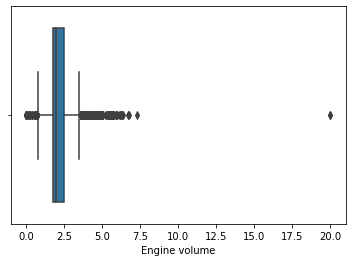

In [18]:
sns.boxplot(x=data1['Engine volume'])
data1 = data1.drop(data1[(data1['Engine volume'] ==20.0)].index)
data1.sort_values(by = 'Engine volume', ascending = False)[:10]






In [19]:
data1.groupby('Price').mean().sort_values(by = 'Price', ascending = False)

,ID,Prod. year,Mileage,Levy,Engine volume,Cylinders,Airbags
Price,,,,,,,
308906,4.581028e+07,2016.000000,8690.000000,1694.000000,4.000000,6.000000,12.000000
297930,4.551071e+07,2017.000000,12250.000000,0.000000,3.500000,8.000000,14.000000
288521,4.576064e+07,2018.000000,13500.000000,2269.000000,4.400000,8.000000,0.000000
260296,4.529116e+07,2018.000000,17700.000000,0.000000,5.700000,8.000000,10.000000
254024,4.499144e+07,2016.000000,73000.000000,1292.000000,3.000000,6.000000,12.000000
...,...,...,...,...,...,...,...
950,4.543321e+07,2006.000000,264000.000000,0.000000,1.500000,4.000000,0.000000
941,4.571267e+07,2012.165354,385914.039370,1131.976378,3.028346,5.551181,9.826772
900,4.570114e+07,1998.000000,1234.000000,0.000000,2.500000,4.000000,2.000000



Plotting the price against other numeric values after removing the outliers  


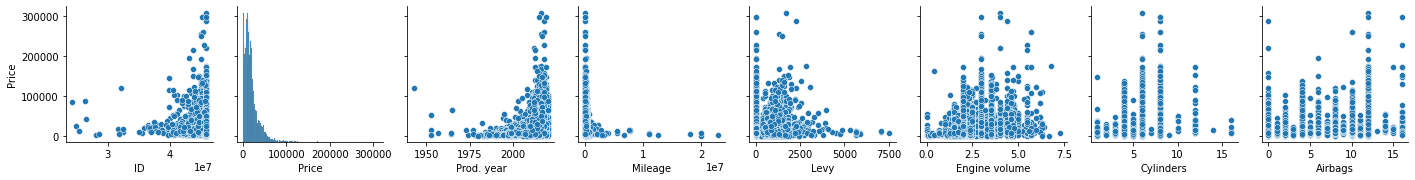

In [20]:
import matplotlib.pyplot as plt
dt_num = data1.select_dtypes(include = ['float64', 'int64'])

for i in range(0, len(dt_num.columns), 10):
    sns.pairplot(data=dt_num,
                x_vars=dt_num.columns[i:i+10],
                y_vars=['Price'])

checking correlation between the price and numreic values

In [21]:
dt_num = data1.select_dtypes(include = ['float64', 'int64'])
dt_num_corr = dt_num.corr()['Price'][:-1] # -1 means that the latest row is SalePrice
top_features = dt_num_corr[abs(dt_num_corr) > 0.2].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {}  correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 3  correlated values with SalePrice:
Price            1.000000
Prod. year       0.345103
Engine volume    0.202068
Name: Price, dtype: float64


Pair plotting all the numeric values against each other

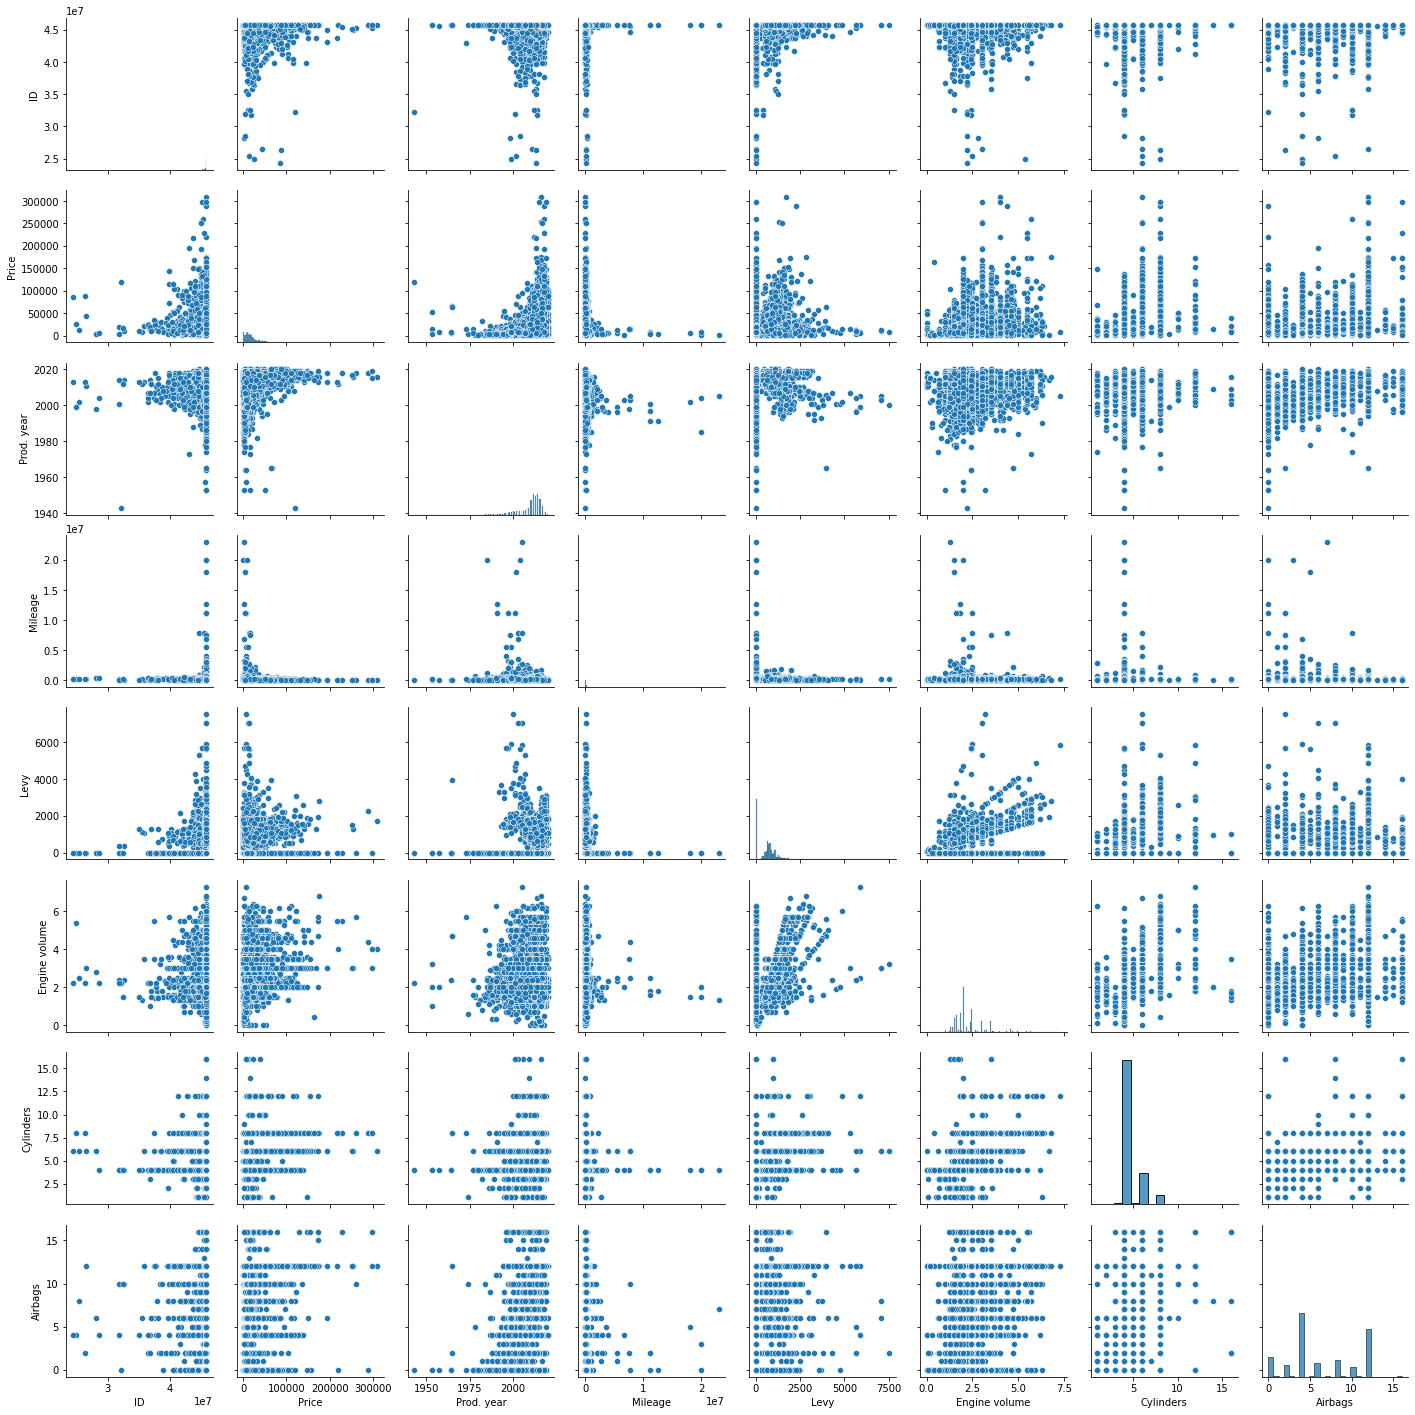

In [22]:
sns.pairplot(dt_num)

checking skewness and dealing with it

In [23]:
print("Skewness: %f" % data['Price'].skew())
skevals=dt_num.skew()

Skewness: 135.387726


In [24]:
skew_limit = 0.75 # define a limit above which we will log transform

skew_cols = (skevals
             
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols




,Skew
ID,-12.175748
Price,3.655148
Prod. year,-1.696706
Mileage,37.651732
Levy,1.396969
Engine volume,1.510587
Cylinders,2.252540


In [25]:
data1['Prod. year']=data1['Prod. year']-min(data1['Prod. year'])




In [26]:

for col,skew in zip(dt_num.columns,skevals):
  if   col== "ID"or col== "Prod. year": 
      continue 
  data1[col]+=1
  data1[col] , l= boxcox(data1[col])
  if   col== "Price":
   print(l)






 

  

  


0.2113956829947456


In [27]:
data1['Doors']

0        04-May
1        04-May
2        04-May
3        04-May
4        04-May
          ...  
19231    04-May
19232    02-Mar
19233    04-May
19234    04-May
19235    04-May
Name: Doors, Length: 16624, dtype: object

In [28]:

data1= data1.drop_duplicates()


In [29]:
data1.groupby('Drive wheels').mean()

,ID,Price,Prod. year,Mileage,Levy,Engine volume,Cylinders,Airbags
Drive wheels,,,,,,,,
4x4,4.555600e+07,31.771743,66.831510,156.898289,13.824278,0.887640,0.960128,3.974047
Front,4.562961e+07,31.057513,68.914817,147.431197,15.367457,0.756148,0.904573,3.639183
Rear,4.550101e+07,30.850269,63.010365,152.009913,8.009743,0.856758,0.948670,4.025580


In [30]:
dt_num = data1.select_dtypes(include = ['float64', 'int64'])
dt_num_corr = dt_num.corr()['Price'][:-1] # -1 means that the latest row is SalePrice
top_features = dt_num_corr[abs(dt_num_corr) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

dt_num

There is 4 strongly correlated values with SalePrice:
Price            1.000000
Prod. year       0.353755
Engine volume    0.127489
Mileage         -0.137534
Name: Price, dtype: float64


,ID,Price,Prod. year,Mileage,Levy,Engine volume,Cylinders,Airbags
0,45654403,30.495936,67,179.195772,24.722616,0.942641,0.982336,6.360419
1,44731507,32.179030,68,181.171157,22.244185,0.898450,0.982336,4.723972
2,45774419,27.274680,63,183.744788,0.000000,0.636270,0.901760,1.580261
3,45769185,21.993117,68,173.341284,21.035838,0.843887,0.901760,0.000000
4,45809263,29.555188,71,140.367196,16.784430,0.636270,0.901760,2.777781
...,...,...,...,...,...,...,...,...
19231,45772306,24.817242,70,148.358100,22.511230,0.942641,0.982336,6.360419
19232,45798355,27.274680,56,211.344297,0.000000,0.774434,0.901760,3.306797
19233,45778856,31.727602,68,170.689440,20.777537,0.831375,0.901760,4.723972
19234,45804997,35.875914,67,152.343252,20.819655,0.774434,0.901760,2.777781


converting the doors column from date to object 

In [31]:
data1['Doors'] = data1['Doors'].replace('04-May', '4-5')
data1['Doors'] = data1['Doors'].replace('02-Mar','2-3')

one hot encoding object columns

In [32]:
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
data1['Doors'] = labelencoder.fit_transform(data1['Doors'])


In [33]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

mask = data.dtypes == object
categorical_cols = data.columns[mask]
categorical_cols

data2=data1[categorical_cols]
data2






,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,1,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,1,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,1,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,1,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,1,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...
19231,MERCEDES-BENZ,E 350,Sedan,Yes,Diesel,Automatic,Rear,1,Left wheel,Grey
19232,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,Manual,Rear,0,Left wheel,Silver
19233,HYUNDAI,Sonata,Sedan,Yes,Petrol,Tiptronic,Front,1,Left wheel,Red
19234,HYUNDAI,Tucson,Jeep,Yes,Diesel,Automatic,Front,1,Left wheel,Grey


In [34]:
data1[categorical_cols]=data2[categorical_cols]
data3=data1[categorical_cols]
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohc = OneHotEncoder( drop='first',)
le = LabelEncoder()
data3col=data3.columns

for col in data3col:
    
    # Integer encode the string categories
    dat = le.fit_transform(data3[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data3 = data3.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data3.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data3 = pd.concat([data3, new_df], axis=1)
data3

c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
c:\users\hp\pycharmprojects\pythonproject5\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If

,Manufacturer_0,Manufacturer_1,Manufacturer_2,Manufacturer_3,Manufacturer_4,Manufacturer_5,Manufacturer_6,Manufacturer_7,Manufacturer_8,Manufacturer_9,...,Color_5,Color_6,Color_7,Color_8,Color_9,Color_10,Color_11,Color_12,Color_13,Color_14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data2=data1
data2 = data2.drop(categorical_cols, axis=1)
data2 = pd.concat([data2, data3], axis=1)
data2 = data2.drop("ID", axis=1)
dt_num = dt_num.drop("ID", axis=1)
data2



,Price,Prod. year,Mileage,Levy,Engine volume,Cylinders,Airbags,Manufacturer_0,Manufacturer_1,Manufacturer_2,...,Color_5,Color_6,Color_7,Color_8,Color_9,Color_10,Color_11,Color_12,Color_13,Color_14
0,30.495936,67,179.195772,24.722616,0.942641,0.982336,6.360419,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,32.179030,68,181.171157,22.244185,0.898450,0.982336,4.723972,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.274680,63,183.744788,0.000000,0.636270,0.901760,1.580261,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.993117,68,173.341284,21.035838,0.843887,0.901760,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29.555188,71,140.367196,16.784430,0.636270,0.901760,2.777781,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,24.817242,70,148.358100,22.511230,0.942641,0.982336,6.360419,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19232,27.274680,56,211.344297,0.000000,0.774434,0.901760,3.306797,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19233,31.727602,68,170.689440,20.777537,0.831375,0.901760,4.723972,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19234,35.875914,67,152.343252,20.819655,0.774434,0.901760,2.777781,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


train ,test data split

In [36]:
from sklearn.model_selection import train_test_split
y_col = 'Price'
X_data=[]
y_data=[]
feature_cols = [x for x in data2.columns if x != y_col]
X_data = data2[feature_cols]
y_data = data2[y_col]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
data1
#s = StandardScaler()
#s.fit(X_train)
#X_train=s.transform(X_train)
#X_test=s.transform(X_test)




X_train



,Prod. year,Mileage,Levy,Engine volume,Cylinders,Airbags,Manufacturer_0,Manufacturer_1,Manufacturer_2,Manufacturer_3,...,Color_5,Color_6,Color_7,Color_8,Color_9,Color_10,Color_11,Color_12,Color_13,Color_14
541,70,161.150787,20.328467,0.843887,0.901760,6.360419,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,74,109.468126,22.236873,0.774434,0.901760,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4309,58,183.744788,0.000000,0.758160,0.901760,2.777781,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17477,74,94.248170,23.812083,0.843887,0.901760,6.360419,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
859,70,216.228044,19.013331,0.774434,0.901760,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12997,73,237.997070,21.271576,0.774434,0.901760,2.777781,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13793,72,261.966516,20.203945,0.774434,0.901760,2.777781,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6208,69,147.010114,18.447493,0.740917,1.029765,6.360419,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
974,70,124.445842,0.000000,0.843887,0.901760,6.360419,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_train2

NameError: name 'X_train2' is not defined

A pipeline of standard scalar , polynomial features, and a linear regressor 

In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
pf = PolynomialFeatures(degree=2)
X_train2=X_train
X_test2=X_test
pf.fit(X_train2)
X_train2=pf.transform(X_train2)
X_test2=pf.transform(X_test2)
LR = LinearRegression()
LR2 = LinearRegression()



Fitting predicting and calculating the errors

In [ ]:
LR2 = LR2.fit(X_train2, y_train)



y_train_pred2 = LR2.predict(X_train2)

y_test_pred2 = LR2.predict(X_test2)

In [ ]:


error_df2=list()

error_df2.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred2),
                           'train2':r2_score(y_train, y_train_pred2),
                           'test' : mean_squared_error(y_test, y_test_pred2),
                          'test2' : r2_score(y_test, y_test_pred2)},
                          
                          ))
error_df2



extracting the Coefficients and sorting them

In [ ]:
coefficients = pd.DataFrame()
p = PolynomialFeatures(degree=2).fit(data2[feature_cols])
coefficients['linear regression'] = LR2.coef_.ravel()
coefficients.applymap(abs)


coefficients['columns']=p.get_feature_names(data2[feature_cols].columns)



coefficients.sort_values(by = 'linear regression', ascending = False)[:20]


Plotting the predictions vs. the ground truth

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
error_df = list()

print('done')
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
pf = PolynomialFeatures(degree=2)

LR = LR.fit(X_train, y_train)



y_train_pred = LR.predict(X_train)

y_test_pred = LR.predict(X_test)
#predictions = cross_val_predict(LR, X_train, y_train, cv = kf)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))
error_df
r2_score(y_test, y_test_pred)
pf = PolynomialFeatures(degree=2)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
alphas2 = np.geomspace(20, 1000, 20)
scores2=[]
s=StandardScaler()


estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("lr", LR)])
estimator.get_params().keys()
r2_score(y_test, y_test_pred)




In [ ]:

coefficients2 = pd.DataFrame()


coefficients2['linear regression'] = LR.coef_.ravel()
coefficients2.applymap(abs)
coefficients2['columns']=data2[feature_cols].columns



coefficients2.sort_values(by = 'linear regression', ascending = False)[:20]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)
ax.plot(y_test, y_test, alpha=.5)
ax.plot(y_test, y_test, alpha=1)
ax.set(xlabel='Ground truth', 
       ylabel='Predictions')


In [ ]:
LR = LinearRegression()
pf = PolynomialFeatures()



estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("lr", LR)])
estimator.get_params().keys()


In [ ]:
params = {
    'polynomial_features__degree': [1,2],
    'polynomial_features__include_bias':[True,False],
    
}

gridLR = GridSearchCV(estimator, params, cv=kf,verbose=10)
gridLR.fit(X_train,y_train)
predictions=gridLR.predict(X_test)



In [ ]:
scoresLR=[]
predictions=gridLR.predict(X_test)

scoresLR.append(r2_score(y_test, predictions))
scoresLR.append(mean_squared_error(y_test, predictions))


scoresLR

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_train, y_train_pred, alpha=.5)
ax.plot(y_train, y_train, alpha=.5)
ax.plot(y_train, y_train, alpha=1)
ax.set(xlabel='Ground truth', 
       ylabel='Predictions')




A ridge regression model was fitted using a grid search with a scalar, polynomial degree of 1 or 2, an alpha of A geometrical space in range of 20 and 1000 and 20 values. The grid search also used a k fold cross validation with 3 folds using the same random state and train test split as before. The plot of alphas vs. scores  

In [ ]:
pf = PolynomialFeatures(degree=2)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
alphas2 = np.geomspace(20, 1000, 20)
ridge = Ridge()
scores2=[]


estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])
estimator.get_params().keys()

In [ ]:
estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])
params = {
    'polynomial_features__degree': [1,2],
    'polynomial_features__include_bias':[True,False],
    'ridge_regression__alpha': alphas2,
}
gridd = GridSearchCV(estimator, params, cv=kf,verbose=10)
gridd.fit(X_train,y_train)

 

getting the best estimator and plotting 

In [ ]:
gridd.best_estimator_

In [ ]:

ax = plt.axes()
#y_train_pred=gridd.predict(X_train)
#pred=gridd.predict(X_test)
# we are going to use y_test, y_test_pred
ax.scatter(y_test, pred2, alpha=.5)
ax.plot(y_test, y_test, alpha=.5)
ax.plot(y_test, y_test, alpha=1)
ax.set(xlabel='Ground truth', 
       ylabel='Predictions')

A lasso regressor was only trained in first degree polynomial due to the slowness of convergence the  
Using k-fold cross validation with alpha in range of [0 – 10 ]and the best performing  model had an alpha of alpha=0.0215 


In [ ]:
pf = PolynomialFeatures(degree=1)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
alphas2 = np.geomspace(0.0000001, 10, 10)
scores2=[]
lass = Lasso(max_iter=100000)


estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("lasso", lass)] )
estimator.get_params().keys()

score

In [ ]:
scorelass=[]

scorelass.append( r2_score(y_train, predictions))

scorelass.append(mean_squared_error(y_train, predictions))
scorelass
gridlass.best_estimator_
lass = Lasso(alpha=0.021544346900318822, max_iter=100000)


In [ ]:
score2 = r2_score(y_train, predictions)

scores2.append(score2)
score2 = mean_squared_error(y_train, predictions)
scores2.append(score2)
scores2
np.geomspace(2000, 2500, 5)

In [ ]:
params = {
    'lasso__alpha': alphas2,
}
scorelass=[]

gridlass = GridSearchCV(estimator, params, cv=kf,verbose=10)
gridlass.fit(X_train,y_train)
predictions=gridlass.predict(X_train)


alphas vs score


In [ ]:
pf = PolynomialFeatures(degree=2)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
alphas = np.geomspace(2000, 2500, 5)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions)
    scores.append(score)

    
plt.plot(alphas, scores)
grid3 = GridSearchCV(estimator, params, cv=kf,verbose=10)

In [ ]:
Lasso = Lasso(alpha=0.021544346900318822, max_iter=100000)
pf = PolynomialFeatures(degree=1)
s.fit(X_train)
x1=s.transform(X_train)
x2=s.transform(X_test)
pf.fit(X_train)
x1=pf.transform(x1)
x2=pf.transform(x2)
Lasso.fit(x1,y_train)


In [ ]:
pred1=Lasso.predict(x1)
pred2=Lasso.predict(x2)

error_df3=list()
error_df3.append(pd.Series({'train mean squared error': mean_squared_error(y_train, pred1),
                           'train r2 scoore':r2_score(y_train, pred1),
                           'test mean squared error' : mean_squared_error(y_test, pred2),
                          'test r2 score' : r2_score(y_test, pred2)},
                          
                          ))
error_df3

In [ ]:
coefficients4= pd.DataFrame()


coefficients4['LASSO regression coefficients'] = Lasso.coef_.ravel()
coefficients4.applymap(abs)
p = PolynomialFeatures(degree=1).fit(data2[feature_cols])

coefficients4['columns']= p.get_feature_names(data2[feature_cols].columns)



coefficients4.sort_values(by = 'LASSO regression coefficients', ascending = False)[:20]

In [ ]:
pf = PolynomialFeatures(degree=1)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
alphas = np.geomspace(0.0000001,10 , 1)
scores=[]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", lasso)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions)
    scores.append(score)

    
plt.plot(alphas, scores)
#grid4 = GridSearchCV(estimator, params, cv=kf,verbose=10)


predicition vs ground reality

In [ ]:
score

ax = plt.axes()
ax.scatter(y_train, predictions)
    
